In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import influxdb_client
import scipy

from influxdb_client.client.write_api import SYNCHRONOUS

import warnings
from influxdb_client.client.warnings import MissingPivotFunction

warnings.simplefilter("ignore", MissingPivotFunction)

# configure influxdb client
ORG = "b4mad"
TOKEN = os.environ.get(
    "INFLUXDB_TOKEN",
    "citqAMr66LLb25hvaaZm2LezOc88k2ocOFJcJDR6QB-RmLJa_-sAr9kYB4vSFYaz8bt26lm7SokVgpQKdgKFKA==",
)
URL = "https://telemetry.b4mad.racing/"

# and create the client and a quary api
client = influxdb_client.InfluxDBClient(url=URL, token=TOKEN, org=ORG)
query_api = client.query_api()

session = 1669961020
lap = 7
game = "rFactor2"
car = "Ferrari F2004"
track = "Silverstone"

In [18]:
query = f"""
from(bucket: "racing")
|> range(start: -10y, stop: now())
|> filter(fn: (r) => r["_measurement"] == "laps_cc")
|> filter(fn: (r) => r["SessionId"] == "{session}")
// |> filter(fn: (r) => r["GameName"] == "{game}")
// |> filter(fn: (r) => r["CarModel"] == "{car}")
// |> filter(fn: (r) => r["TrackCode"] == "{track}")
|> filter(fn: (r) => r["CurrentLap"] == "{lap}")
|> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
|> sort(columns: ["_time"], desc: false)
"""
df = query_api.query_data_frame(org=ORG, query=query)

,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,...,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,GearMin
0,_result,0,2012-12-07 19:43:39.096561+00:00,2022-12-08 07:43:39.096561+00:00,2022-12-02 06:21:38.397000+00:00,Dallara IR18,7,iRacing,1669961020,Practice,...,1.0,103.584500,0.152909,5.0,0.0,0.0,69.509940,-0.002667,1.0,NaN
1,_result,0,2012-12-07 19:43:39.096561+00:00,2022-12-08 07:43:39.096561+00:00,2022-12-02 06:21:38.428000+00:00,Dallara IR18,7,iRacing,1669961020,Practice,...,1.0,103.617836,2.469688,5.0,0.0,0.0,69.569214,-0.002424,1.0,0.0
2,_result,0,2012-12-07 19:43:39.096561+00:00,2022-12-08 07:43:39.096561+00:00,2022-12-02 06:21:38.458000+00:00,Dallara IR18,7,iRacing,1669961020,Practice,...,1.0,103.651169,4.789325,5.0,0.0,0.0,69.674910,-0.002182,1.0,0.0
3,_result,0,2012-12-07 19:43:39.096561+00:00,2022-12-08 07:43:39.096561+00:00,2022-12-02 06:21:38.489000+00:00,Dallara IR18,7,iRacing,1669961020,Practice,...,1.0,103.684500,7.112450,5.0,0.0,0.0,69.769540,-0.016725,1.0,0.0
4,_result,0,2012-12-07 19:43:39.096561+00:00,2022-12-08 07:43:39.096561+00:00,2022-12-02 06:21:38.520000+00:00,Dallara IR18,7,iRacing,1669961020,Practice,...,1.0,103.717842,9.438454,5.0,0.0,0.0,69.847710,-0.034175,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,_result,0,2012-12-07 19:43:39.096561+00:00,2022-12-08 07:43:39.096561+00:00,2022-12-02 06:21:41.946000+00:00,Dallara IR18,7,iRacing,1669961020,Practice,...,1.0,3.586372,259.931030,6.0,0.0,0.0,75.414986,-0.097681,1.0,0.0
116,_result,0,2012-12-07 19:43:39.096561+00:00,2022-12-08 07:43:39.096561+00:00,2022-12-02 06:21:41.976000+00:00,Dallara IR18,7,iRacing,1669961020,Practice,...,1.0,3.603038,261.185822,6.0,0.0,0.0,75.435300,-0.096953,1.0,0.0
117,_result,0,2012-12-07 19:43:39.096561+00:00,2022-12-08 07:43:39.096561+00:00,2022-12-02 06:21:42.007000+00:00,Dallara IR18,7,iRacing,1669961020,Practice,...,1.0,3.636372,263.696869,6.0,0.0,0.0,75.489530,-0.071018,1.0,0.0
118,_result,0,2012-12-07 19:43:39.096561+00:00,2022-12-08 07:43:39.096561+00:00,2022-12-02 06:21:42.038000+00:00,Dallara IR18,7,iRacing,1669961020,Practice,...,1.0,3.669705,266.209961,6.0,0.0,0.0,75.533800,-0.027874,1.0,0.0


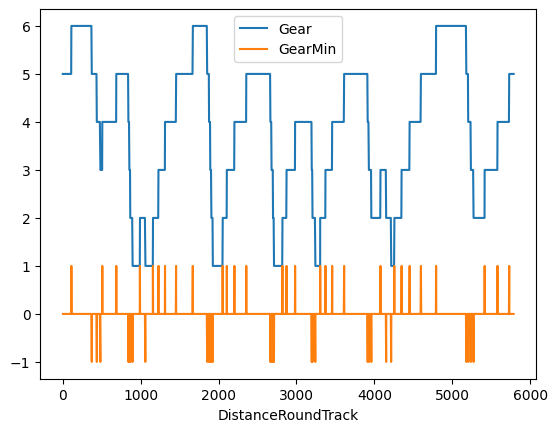

In [22]:
# show only the CurrentLapTime and DistanceOnTrack column
# df[["CurrentLapTime", "DistanceRoundTrack", "CurrentLapTime"]]

# filter CurrentLap == 1
# df[df["CurrentLap"] == "0"]

# convert CurrentLap to int
df["CurrentLap"] = df["CurrentLap"].astype(int)

# plot the CurrentLapTime and DistanceOnTrack column

# plat _time on the x axis and CurrentLapTime and CurrentLap on the y axis
# df.plot(x="DistanceRoundTrack", y="Gear")
# df.plot(x="_time", y=["CurrentLapTime"])

# df.head(120)

# remove all rows with Gear == 0
df = df[df["Gear"] != 0]

# find every local minimum for Gear and set the result to GearMin
df["GearMin"] = df["Gear"].diff()

# plot GearMin and Gear on the y axis and DistanceRoundTrack on the x axis
df.plot(x="DistanceRoundTrack", y=["Gear", "GearMin"])

df.head(120)

<AxesSubplot:xlabel='WorldPosition_x', ylabel='WorldPosition_y'>

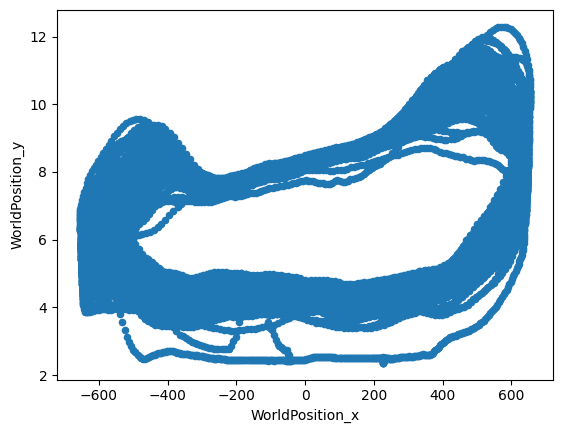

In [5]:
# select CurrentLapTime == 2
# plot WorldPosition_x WorldPosition_x and WorldPosition_z as a 3d plot
df.plot.scatter(x="WorldPosition_x", y="WorldPosition_y")